In [0]:
from imutils import paths
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.ensemble import IsolationForest
import pickle

In [0]:
def quantify_image(image, bins=(4, 6, 3)):

	hist = cv2.calcHist([image], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	hist = cv2.normalize(hist, hist).flatten()
	return hist

In [0]:
def load_dataset(datasetPath, bins):
	
	imagePaths = list(paths.list_images(datasetPath))
	data = []

	for imagePath in imagePaths:
		
		image = cv2.imread(imagePath)
		image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

		features = quantify_image(image, bins)
		data.append(features)

	return np.array(data)

In [0]:
dataset = './dataset/' # insert training images in this directory
data = load_dataset(dataset, bins = (3, 3, 3))

In [95]:
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [0]:
model_name = 'anomaly_detector'

In [0]:
f = open(model_name, "wb")
f.write(pickle.dumps(model))
f.close()

In [98]:
model = pickle.loads(open(model_name, "rb").read())
print(model)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)


In [0]:
test_image = 'test.jpg'

In [0]:
image = cv2.imread(test_image)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
features = quantify_image(hsv, bins=(3, 3, 3))

In [0]:
preds = model.predict([features])[0]
label = "ANOMALY" if preds == -1 else "NORMAL"
color = (255, 0, 0) if preds == -1 else (0, 255, 0)

In [102]:
cv2.putText(image, label, (10,  25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
print(label)

ANOMALY


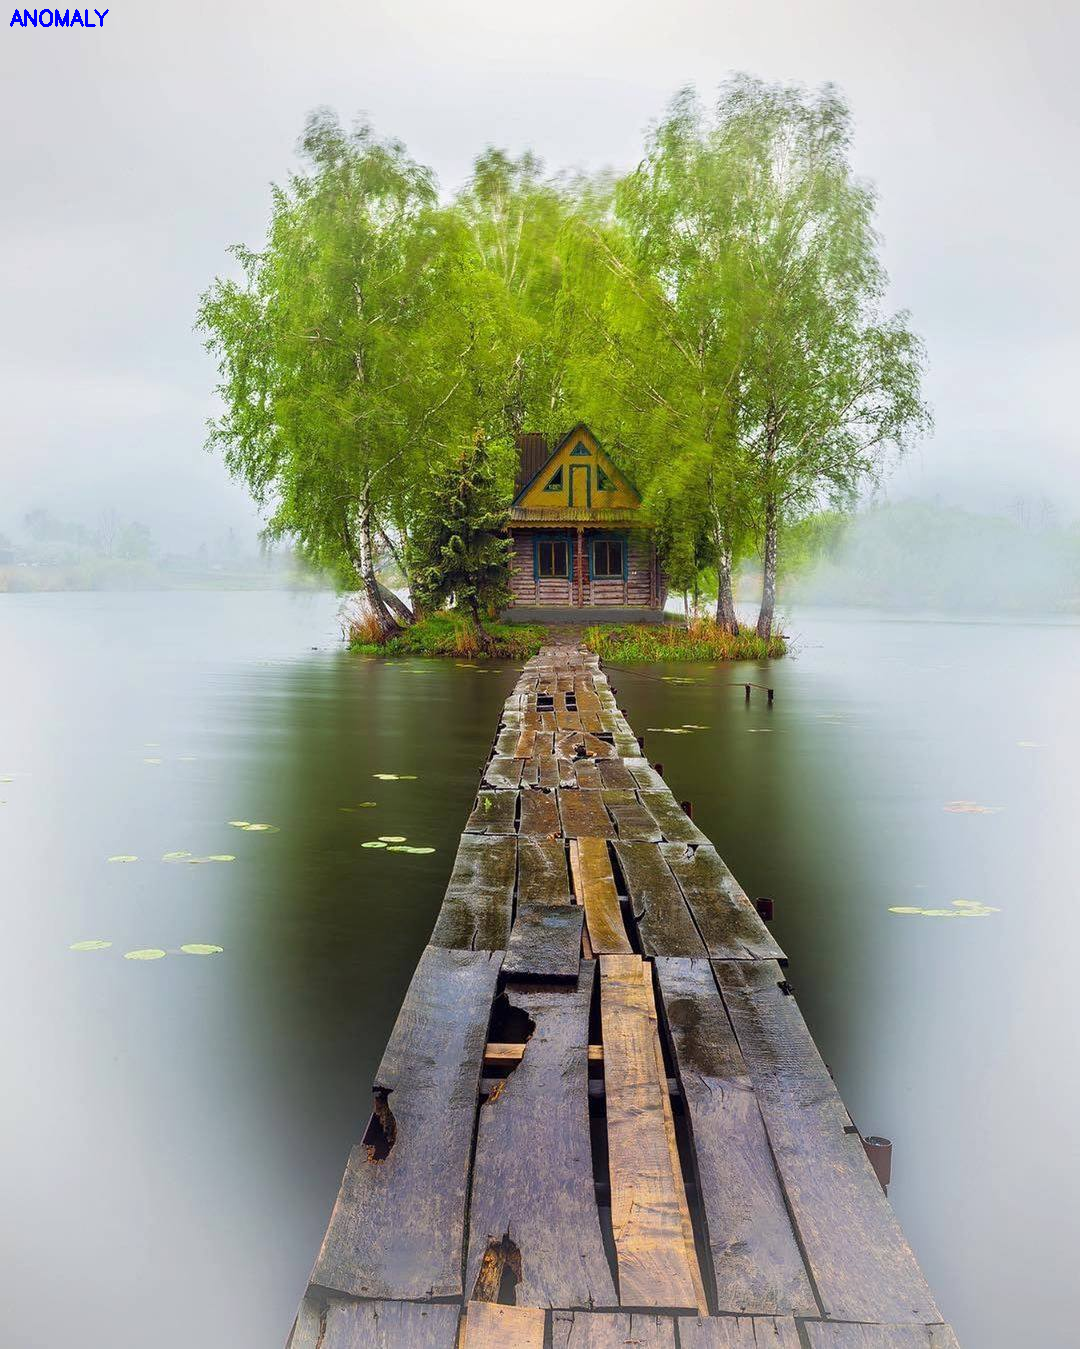

In [103]:
cv2_imshow(image)